In [121]:
import torch
import torch.nn as nn
import torch.nn.functional as F

# BatchNorm 1d

In [313]:
# criando um tensor com 3 instancias (N (Batch Size): 3) e Num Features 2 (C: 2)
input = torch.tensor(
        [
            [2, 1],
            [6, 2],
            [4, 3]
        ], dtype=torch.bfloat16
)

In [314]:
input

tensor([[2., 1.],
        [6., 2.],
        [4., 3.]], dtype=torch.bfloat16)

In [310]:
instance_norm = nn.InstanceNorm1d(num_features=2, affine=False)

In [311]:
instance_norm(input)

tensor([[ 0.0000, -1.2266,  1.2266],
        [ 1.2266, -1.2266,  0.0000],
        [-0.6992, -0.7188,  1.4141]], dtype=torch.bfloat16)

In [235]:
# Usando nn.BatchNorm1d como temos 2 features temos num_features=C (que nesse exemplo é: 2)
batchnorm1d = nn.BatchNorm1d(num_features=2, affine=False)
batchnorm1d(input)

tensor([[-1.2266, -1.2266],
        [ 1.2266,  0.0000],
        [ 0.0000,  1.2266]], dtype=torch.bfloat16)

In [236]:
# isso nos retorna estatisticas interessantes:
print(f'Media por Feature (C):     {batchnorm1d.running_mean}')
print(f'Variancia por Feature (C): {batchnorm1d.running_var}')

Media por Feature (C):     tensor([0.4000, 0.2000])
Variancia por Feature (C): tensor([1.3000, 1.0000])


In [237]:
mean = input.mean(dim=0)
var = input.var(dim=0, unbiased=False)

In [238]:
mean

tensor([4., 2.], dtype=torch.bfloat16)

In [239]:
var

tensor([2.6719, 0.6680], dtype=torch.bfloat16)

In [240]:
F.batch_norm(input, running_mean=mean, running_var=var)

tensor([[-1.2266, -1.2266],
        [ 1.2266,  0.0000],
        [ 0.0000,  1.2266]], dtype=torch.bfloat16)

# BatchNorm 2d

In [196]:
input = torch.randn(4, 2, 2, 2)
input = torch.randint(0, 3, (2, 2, 2, 2), dtype=torch.bfloat16)
input

tensor([[[[2., 0.],
          [0., 0.]],

         [[2., 0.],
          [2., 1.]]],


        [[[0., 0.],
          [0., 2.]],

         [[0., 1.],
          [1., 1.]]]], dtype=torch.bfloat16)

In [315]:
import torch

# Lista de números
lista = [
    [[[2., 0.],
      [0., 0.]],

     [[2., 0.],
      [2., 1.]]],

    [[[0., 0.],
      [0., 2.]],

     [[0., 1.],
      [1., 1.]]]
]

# Transforma a lista em um tensor PyTorch
input = torch.tensor(lista, dtype=torch.bfloat16)

In [206]:
batchnorm2d = nn.BatchNorm2d(num_features=2, affine=False)
batchnorm2d(input)

tensor([[[[ 1.7344, -0.5781],
          [-0.5781, -0.5781]],

         [[ 1.4141, -1.4141],
          [ 1.4141,  0.0000]]],


        [[[-0.5781, -0.5781],
          [-0.5781,  1.7344]],

         [[-1.4141,  0.0000],
          [ 0.0000,  0.0000]]]], dtype=torch.bfloat16)

In [207]:
# isso nos retorna estatisticas interessantes:
print(f'Media por Feature (C):     {batchnorm2d.running_mean}')
print(f'Variancia por Feature (C): {batchnorm2d.running_var}')

Media por Feature (C):     tensor([0.0500, 0.1000])
Variancia por Feature (C): tensor([0.9857, 0.9571])


In [209]:
mean = input.mean(dim=(0, 2, 3))
var = input.var(dim=(0, 2, 3), unbiased=False)
F.batch_norm(input, running_mean=mean, running_var=var)

tensor([[[[ 1.7344, -0.5781],
          [-0.5781, -0.5781]],

         [[ 1.4141, -1.4141],
          [ 1.4141,  0.0000]]],


        [[[-0.5781, -0.5781],
          [-0.5781,  1.7344]],

         [[-1.4141,  0.0000],
          [ 0.0000,  0.0000]]]], dtype=torch.bfloat16)

In [203]:
input.mean(dim=(0,2,3))

tensor([0.5000, 1.0000], dtype=torch.bfloat16)

In [205]:
input.var(dim=(0,2,3), unbiased=False)

tensor([0.7500, 0.5000], dtype=torch.bfloat16)

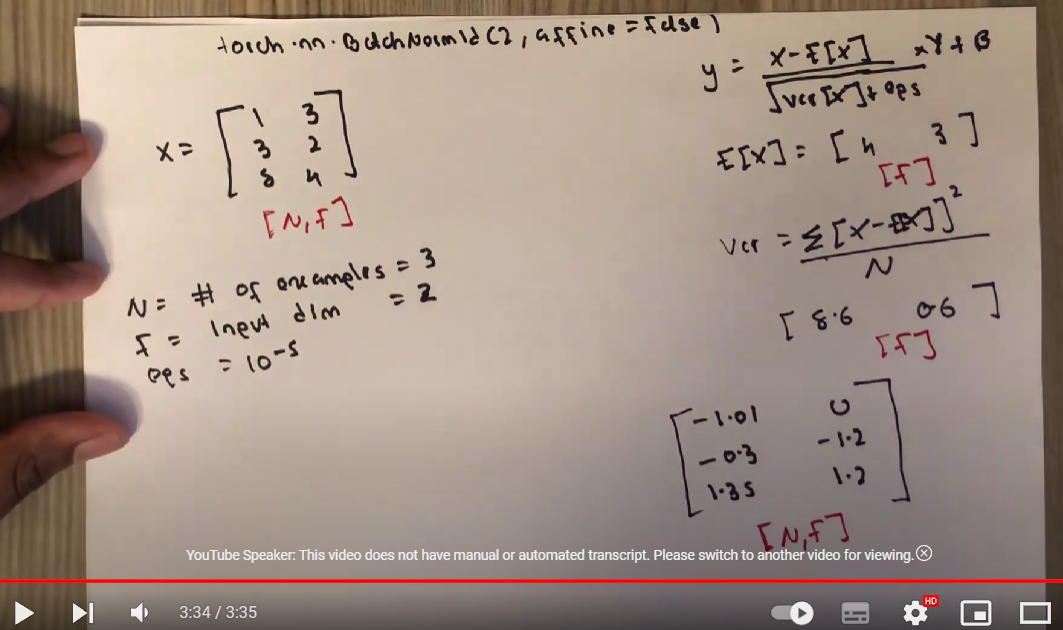

In [106]:
tensor1d = torch.tensor(
    [[1, 3],
    [3, 2],
    [8, 4]], dtype=torch.bfloat16
)

In [107]:
nn.BatchNorm1d(num_features=2)(tensor1d)

tensor([[-1.0156,  0.0000],
        [-0.3398, -1.2266],
        [ 1.3594,  1.2266]], dtype=torch.bfloat16,
       grad_fn=<NativeBatchNormBackward0>)

Inicialização (__init__):

A classe BatchNorm2d é uma subclasse de nn.Module, o que a torna um módulo PyTorch.
Ela recebe parâmetros como num_features, que indica o número de canais na entrada, eps que é um valor pequeno adicionado ao denominador para evitar divisões por zero, e momentum, que é o fator de momentum para calcular as médias e variâncias em execução.
Durante a inicialização, os parâmetros weight (pesos) e bias (viés) são criados como tensores de dimensão num_features, e eles são tratados como parâmetros treináveis (usando nn.Parameter).
Além disso, são criados os tensores running_mean e running_var para manter as médias e variâncias em execução, respectivamente. Eles são inicializados com zeros e uns, respectivamente, e são registrados como buffers para garantir que sejam tratados corretamente como parte do estado do modelo.
Método forward:

No método forward, calculamos a média e a variância ao longo das dimensões do lote, altura e largura da entrada x.
Se estivermos em modo de treinamento (self.training == True), atualizamos as médias e variâncias em execução com base nas médias e variâncias calculadas neste lote, utilizando o fator de momentum especificado.
Normalizamos a entrada x com base nas médias e variâncias calculadas, adicionando um pequeno valor eps ao denominador para estabilidade numérica.
Em seguida, aplicamos os pesos (self.weight) e o viés (self.bias) à entrada normalizada.
Finalmente, retornamos a saída normalizada.
Resumindo, esta classe implementa a normalização em lote para tensores 2D ou 3D (tipicamente usados em redes neurais convolucionais), permitindo que a rede aprenda a normalizar as entradas para cada canal independentemente, o que ajuda na estabilidade e convergência do treinamento. Durante o treinamento, ela também mantém as médias e variâncias em execução para serem usadas na fase de teste ou inferência.

In [77]:
class MyBatchNorm2d(nn.Module):
    def __init__(self, num_features, eps=1e-5, momentum=0.1):
        super(MyBatchNorm2d, self).__init__()
        self.num_features = num_features
        self.eps = eps
        self.momentum = momentum

        # Inicialização dos parâmetros
        self.weight = nn.Parameter(torch.ones(num_features))
        self.bias = nn.Parameter(torch.zeros(num_features))
        self.register_buffer('running_mean', torch.zeros(num_features))
        self.register_buffer('running_var', torch.ones(num_features))

    def forward(self, x):
        # Calcula a média e variância ao longo das dimensões do lote, altura e largura
        mean = x.mean(dim=(0, 2, 3), keepdim=True)
        var = x.var(dim=(0, 2, 3), unbiased=False, keepdim=True)

        # Atualiza as médias e variâncias em execução durante o treinamento
        if self.training:
            self.running_mean = (1 - self.momentum) * self.running_mean + self.momentum * mean.squeeze()
            self.running_var = (1 - self.momentum) * self.running_var + self.momentum * var.squeeze()

        # Normalização em lote
        x_normalized = (x - mean) / torch.sqrt(var + self.eps)

        # Aplica os pesos e o viés
        out = self.weight.view(1, -1, 1, 1) * x_normalized + self.bias.view(1, -1, 1, 1)
        return out

In [78]:
bn = MyBatchNorm2d(num_features=5)

In [79]:
# Criando 1 B, 2 C, 3 W, 3 H 
tensor = torch.randint(0, 3, (1, 5, 3, 3), dtype=torch.bfloat16)
print(tensor)

tensor([[[[0., 0., 1.],
          [0., 1., 1.],
          [2., 2., 0.]],

         [[2., 2., 1.],
          [0., 1., 2.],
          [1., 1., 1.]],

         [[2., 2., 2.],
          [1., 2., 1.],
          [2., 1., 1.]],

         [[2., 0., 2.],
          [0., 0., 2.],
          [0., 2., 1.]],

         [[0., 0., 0.],
          [2., 0., 2.],
          [1., 2., 1.]]]], dtype=torch.bfloat16)


In [80]:
bn(tensor)

tensor([[[[-0.9883, -0.9883,  0.2832],
          [-0.9883,  0.2832,  0.2832],
          [ 1.5547,  1.5547, -0.9883]],

         [[ 1.2422,  1.2422, -0.3477],
          [-1.9375, -0.3477,  1.2422],
          [-0.3477, -0.3477, -0.3477]],

         [[ 0.8984,  0.8984,  0.8984],
          [-1.1172,  0.8984, -1.1172],
          [ 0.8984, -1.1172, -1.1172]],

         [[ 1.0547, -1.0547,  1.0547],
          [-1.0547, -1.0547,  1.0547],
          [-1.0547,  1.0547,  0.0000]],

         [[-1.0156, -1.0156, -1.0156],
          [ 1.2656, -1.0156,  1.2656],
          [ 0.1250,  1.2656,  0.1250]]]], grad_fn=<AddBackward0>)

In [81]:
tensor.shape

torch.Size([1, 5, 3, 3])

In [82]:
# Atenção você não pode ter a dim do batch só das linhas, colunas
batch_norm = nn.BatchNorm2d(num_features=5, affine=False)

In [83]:
batchnorm_tensor = batch_norm(tensor)
print(batchnorm_tensor)

tensor([[[[-0.9883, -0.9883,  0.2832],
          [-0.9883,  0.2832,  0.2832],
          [ 1.5547,  1.5547, -0.9883]],

         [[ 1.2344,  1.2344, -0.3535],
          [-1.9453, -0.3535,  1.2344],
          [-0.3535, -0.3535, -0.3535]],

         [[ 0.8945,  0.8945,  0.8945],
          [-1.1172,  0.8945, -1.1172],
          [ 0.8945, -1.1172, -1.1172]],

         [[ 1.0625, -1.0625,  1.0625],
          [-1.0625, -1.0625,  1.0625],
          [-1.0625,  1.0625,  0.0000]],

         [[-1.0156, -1.0156, -1.0156],
          [ 1.2734, -1.0156,  1.2734],
          [ 0.1270,  1.2734,  0.1270]]]], dtype=torch.bfloat16)


In [39]:
batch_norm.running_mean

tensor([0.0556, 0.0444])

In [40]:
# Calculando a média e a variância do lote
mean_batch = tensor.mean(dim=0, keepdim=True)
var_batch = tensor.var(dim=0, keepdim=True, unbiased=False)
print(f'Mean Batch:\n{mean_batch}')
print(f'Var Batch:\n{var_batch}')

Mean Batch:
tensor([[[[1., 1., 0.],
          [1., 0., 1.],
          [1., 0., 0.]],

         [[1., 0., 1.],
          [0., 0., 1.],
          [1., 0., 0.]]]], dtype=torch.bfloat16)
Var Batch:
tensor([[[[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],

         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]]]], dtype=torch.bfloat16)


In [15]:
# Aplicando a normalização em lote manualmente
manual_batchnorm = (tensor - mean_batch) / torch.sqrt(var_batch)
print(manual_batchnorm)

tensor([[[-1., nan,  1.],
         [-1.,  1.,  1.],
         [-1.,  1., -1.]],

        [[ 1., nan, -1.],
         [ 1., -1., -1.],
         [ 1., -1.,  1.]]], dtype=torch.bfloat16)


In [16]:
manual_batchnorm == batchnorm_tensor

tensor([[[False, False, False],
         [ True,  True,  True],
         [ True,  True,  True]],

        [[False, False, False],
         [ True,  True,  True],
         [ True,  True,  True]]])

# Layer Norm

In [247]:
input.shape

torch.Size([2, 2, 2, 2])

In [250]:
C = 2
H = 2
W = 2
ln = nn.LayerNorm(normalized_shape=(C, H, W), elementwise_affine=False)

In [251]:
ln(input)

tensor([[[[ 1.2109, -0.9453],
          [-0.9453, -0.9453]],

         [[ 1.2109, -0.9453],
          [ 1.2109,  0.1348]]],


        [[[-0.8984, -0.8984],
          [-0.8984,  1.9766]],

         [[-0.8984,  0.5391],
          [ 0.5391,  0.5391]]]], dtype=torch.bfloat16)

In [256]:
mean = input.mean(dim=(1,2,3), keepdim=True)
var = input.var(dim=(1,2,3), keepdim=True, unbiased=False)

In [257]:
mean

tensor([[[[0.8750]]],


        [[[0.6250]]]], dtype=torch.bfloat16)

In [258]:
var

tensor([[[[0.8594]]],


        [[[0.4844]]]], dtype=torch.bfloat16)

In [255]:
F.layer_norm(input, normalized_shape=(2,2,2))

tensor([[[[ 1.2109, -0.9453],
          [-0.9453, -0.9453]],

         [[ 1.2109, -0.9453],
          [ 1.2109,  0.1348]]],


        [[[-0.8984, -0.8984],
          [-0.8984,  1.9766]],

         [[-0.8984,  0.5391],
          [ 0.5391,  0.5391]]]], dtype=torch.bfloat16)

In [259]:
manual_ln = (tensor - mean) / torch.sqrt(var + layer_norm.eps)

In [260]:
manual_ln

tensor([[[[ 1.2188, -0.9453],
          [-0.9453, -0.9453]],

         [[ 1.2188, -0.9453],
          [ 1.2188,  0.1348]]],


        [[[-0.8984, -0.8984],
          [-0.8984,  1.9766]],

         [[-0.8984,  0.5391],
          [ 0.5391,  0.5391]]]], dtype=torch.bfloat16)

In [365]:
valores = [
    .2, .1, .3, 0.5, .1, .1,
    .2, .1, .3, .6, .7, .9    
]

# Transforma os valores em um tensor PyTorch com a forma (1, 2, 3)
input2 = torch.tensor(valores).view(2, 2, 3)

In [360]:
input2.shape

torch.Size([2, 2, 3])

In [361]:
input2

tensor([[[0.2000, 0.1000, 0.3000],
         [0.5000, 0.1000, 0.1000]],

        [[0.2000, 0.1000, 0.4000],
         [0.6000, 0.7000, 0.9000]]])

In [362]:
N, S, E = input2.size()

In [363]:
ln = nn.LayerNorm(normalized_shape=(S, E))
ln(input2)

tensor([[[-0.1139, -0.7975,  0.5697],
         [ 1.9369, -0.7975, -0.7975]],

        [[-1.0141, -1.3720, -0.2983],
         [ 0.4176,  0.7755,  1.4913]]], grad_fn=<NativeLayerNormBackward0>)

In [304]:
ln = nn.LayerNorm(normalized_shape=(S, E))
ln(input2)

tensor([[[-0.1139, -0.7975,  0.5697],
         [ 1.9369, -0.7975, -0.7975]]], grad_fn=<NativeLayerNormBackward0>)

In [366]:
ln = nn.LayerNorm(normalized_shape=(E))
ln(input2)

tensor([[[ 0.0000, -1.2238,  1.2238],
         [ 1.4140, -0.7070, -0.7070]],

        [[ 0.0000, -1.2238,  1.2238],
         [-1.0687, -0.2672,  1.3359]]], grad_fn=<NativeLayerNormBackward0>)

In [305]:
ln = nn.LayerNorm(normalized_shape=(E))
ln(input2)

tensor([[[ 0.0000, -1.2238,  1.2238],
         [ 1.4140, -0.7070, -0.7070]]], grad_fn=<NativeLayerNormBackward0>)

In [ ]:
nn.InstanceNorm2d()

In [97]:
class MyLayerNorm(nn.Module):
    def __init__(self, normalized_shape, eps=1e-5):
        super(MyLayerNorm, self).__init__()
        self.normalized_shape = normalized_shape
        self.eps = eps

        # Inicialização dos parâmetros
        self.weight = nn.Parameter(torch.ones(normalized_shape))
        self.bias = nn.Parameter(torch.zeros(normalized_shape))

    def forward(self, x):
        # Calcula a média e variância ao longo das dimensões especificadas por normalized_shape
        mean = x.mean(dim=tuple(range(x.dim())[1:]), keepdim=True)
        var = x.var(dim=tuple(range(x.dim())[1:]), unbiased=False, keepdim=True)

        # Normalização em camada
        x_normalized = (x - mean) / torch.sqrt(var + self.eps)

        # Aplica os pesos e o viés
        out = self.weight * x_normalized + self.bias
        return out

In [92]:
# exemplo com imagem (B, C, H, W): (2, 3, 2, 2)
# 1º batch
tensor = torch.tensor([[[[1, 2],  # 1º canal 1º batch
                          [0, 0]],

                         [[0, 1],  # 2º canal 1º batch
                          [0, 0]],
                
                         [[2, 1],  # 3º canal 1º batch
                          [1, 1]]],

# 2º batch
                        [[[2, 0],  # 1º canal 2º batch
                          [1, 1]],

                         [[2, 0],  # 2º canal 2º batch
                          [2, 2]],

                         [[1, 2],  # 3º canal 2º batch
                          [2, 2]]]], dtype=torch.bfloat16)

In [93]:
tensor.shape

torch.Size([2, 3, 2, 2])

In [94]:
# como eu quero normalizar por canal eu coloco normalized_shape=(3, 2, 2) Pois eu não estou olhando para o Batch por isso eu removo o 2,
layer_norm = nn.LayerNorm(normalized_shape=(3, 2, 2), elementwise_affine=False)

Claro! Vamos analisar a classe LayerNorm e o papel do parâmetro normalized_shape passo a passo:

Inicialização (__init__):

A classe LayerNorm é uma subclasse de nn.Module, tornando-a um módulo PyTorch.
Ela recebe um parâmetro normalized_shape, que é uma tupla que especifica o tamanho das dimensões a serem normalizadas.
eps é um valor pequeno adicionado ao denominador para evitar divisões por zero.
Durante a inicialização, os parâmetros weight (pesos) e bias (viés) são criados como tensores com o tamanho especificado por normalized_shape, e eles são tratados como parâmetros treináveis (usando nn.Parameter).
Método forward:

No método forward, calculamos a média e a variância ao longo das dimensões especificadas por normalized_shape. Isso é feito utilizando a função mean e var de PyTorch, onde dim=tuple(range(x.dim())[1:]) é usado para especificar todas as dimensões exceto a dimensão de lote (batch).
Normalizamos a entrada com base nas médias e variâncias calculadas e adicionamos um pequeno valor eps ao denominador para estabilidade numérica.
Em seguida, aplicamos os pesos e o viés.
A saída normalizada é retornada.
O papel de normalized_shape:

O parâmetro normalized_shape é crucial para determinar quais dimensões da entrada serão normalizadas.
Por exemplo, se a entrada for um tensor 2D (por exemplo, uma camada totalmente conectada), podemos especificar normalized_shape=(1, num_features) para normalizar ao longo da dimensão de features.
Se a entrada for um tensor 3D (por exemplo, uma convolução), podemos especificar normalized_shape=(C, H, W) para normalizar ao longo das dimensões de canais, altura e largura.
Isso torna a classe LayerNorm flexível o suficiente para ser aplicada a diferentes tipos de entradas em diferentes tipos de camadas, permitindo normalização personalizada.

In [95]:
layernorm_tensor = layer_norm(tensor)
layernorm_tensor

tensor([[[[ 0.3457,  1.7344],
          [-1.0391, -1.0391]],

         [[-1.0391,  0.3457],
          [-1.0391, -1.0391]],

         [[ 1.7344,  0.3457],
          [ 0.3457,  0.3457]]],


        [[[ 0.7695, -1.8672],
          [-0.5469, -0.5469]],

         [[ 0.7695, -1.8672],
          [ 0.7695,  0.7695]],

         [[-0.5469,  0.7695],
          [ 0.7695,  0.7695]]]], dtype=torch.bfloat16)

In [98]:
ln = MyLayerNorm((3, 2, 2))

In [99]:
ln(tensor)

tensor([[[[ 0.3457,  1.7266],
          [-1.0391, -1.0391]],

         [[-1.0391,  0.3457],
          [-1.0391, -1.0391]],

         [[ 1.7266,  0.3457],
          [ 0.3457,  0.3457]]],


        [[[ 0.7695, -1.8594],
          [-0.5430, -0.5430]],

         [[ 0.7695, -1.8594],
          [ 0.7695,  0.7695]],

         [[-0.5430,  0.7695],
          [ 0.7695,  0.7695]]]], grad_fn=<AddBackward0>)

In [79]:
# removo a dim do batch por isso não coloco o 0
mean_layer = tensor.mean(dim=(1, 2, 3), keepdim=True)
print(mean_layer)
var_layer = tensor.var(dim=(1, 2, 3), keepdim=True, unbiased=False)
print(var_layer)

tensor([[[[0.7500]]],


        [[[1.4141]]]], dtype=torch.bfloat16)
tensor([[[[0.5195]]],


        [[[0.5781]]]], dtype=torch.bfloat16)


In [80]:
# Normalizando manualmente
manual_batchnorm = (tensor - mean_layer) / torch.sqrt(var_layer + layer_norm.eps)

In [81]:
print(f'Manualmente:\n{manual_batchnorm}')
print(f'\nUsando LayerNorm:\n{layernorm_tensor}')
print('\nElas estão muito proximas mas não são identicas, porque?')

Manualmente:
tensor([[[[ 0.3457,  1.7266],
          [-1.0391, -1.0391]],

         [[-1.0391,  0.3457],
          [-1.0391, -1.0391]],

         [[ 1.7266,  0.3457],
          [ 0.3457,  0.3457]]],


        [[[ 0.7695, -1.8594],
          [-0.5430, -0.5430]],

         [[ 0.7695, -1.8594],
          [ 0.7695,  0.7695]],

         [[-0.5430,  0.7695],
          [ 0.7695,  0.7695]]]], dtype=torch.bfloat16)

Usando LayerNorm:
tensor([[[[ 0.3457,  1.7344],
          [-1.0391, -1.0391]],

         [[-1.0391,  0.3457],
          [-1.0391, -1.0391]],

         [[ 1.7344,  0.3457],
          [ 0.3457,  0.3457]]],


        [[[ 0.7695, -1.8672],
          [-0.5469, -0.5469]],

         [[ 0.7695, -1.8672],
          [ 0.7695,  0.7695]],

         [[-0.5469,  0.7695],
          [ 0.7695,  0.7695]]]], dtype=torch.bfloat16)

Elas estão muito proximas mas não são identicas, porque?


In [65]:
# Exemplo com texto ()
# 2: sequencias, 3: tokens, 5: embeddings
X = torch.randint(0, 10, (2, 3, 5), dtype=torch.bfloat16)
normalized_shape = (5,)  # normalização feita na dimensão do embedding
layer_norm = nn.LayerNorm(normalized_shape=normalized_shape, elementwise_affine=False)

In [66]:
X

tensor([[[2., 4., 4., 0., 2.],
         [6., 2., 9., 9., 4.],
         [1., 5., 0., 5., 1.]],

        [[3., 6., 9., 7., 1.],
         [6., 5., 9., 1., 5.],
         [6., 6., 8., 2., 6.]]], dtype=torch.bfloat16)

In [67]:
layer_norm(X)

tensor([[[-0.2676,  1.0703,  1.0703, -1.6016, -0.2676],
         [ 0.0000, -1.4531,  1.0859,  1.0859, -0.7266],
         [-0.6484,  1.2031, -1.1172,  1.2031, -0.6484]],

        [[-0.7695,  0.2793,  1.3281,  0.6289, -1.4688],
         [ 0.3125, -0.0781,  1.4844, -1.6406, -0.0781],
         [ 0.2041,  0.2041,  1.2266, -1.8359,  0.2041]]], dtype=torch.bfloat16)

In [74]:
# provando manualmente
mean_layer = X.mean(dim=2, keepdims=True)
var_layer = X.var(dim=2, keepdims=True, unbiased=False)

In [75]:
manual_layer = (X - mean_layer) / torch.sqrt(var_layer + layer_norm.eps)

In [76]:
# novamente chega muito proximo mas não bate nas casas decimais
manual_layer

tensor([[[-0.2715,  1.0703,  1.0703, -1.6094, -0.2715],
         [ 0.0000, -1.4531,  1.0938,  1.0938, -0.7266],
         [-0.6523,  1.2031, -1.1172,  1.2031, -0.6523]],

        [[-0.7656,  0.2832,  1.3359,  0.6328, -1.4609],
         [ 0.3164, -0.0732,  1.4844, -1.6328, -0.0732],
         [ 0.2070,  0.2070,  1.2266, -1.8359,  0.2070]]], dtype=torch.bfloat16)

Em outras palavras, se você está operando em um tensor tridimensional, como no seu caso onde cada "matriz" representa uma frase e cada linha é um token com seu embedding, o normalized_shape deve ser um tuple que corresponde ao número de dimensões que você deseja normalizar.

Por exemplo, se você tem um tensor com shape (batch_size, sequence_length, embedding_size), e deseja normalizar ao longo das dimensões dos embeddings (ou seja, ao longo da dimensão do embedding_size), você deve definir normalized_shape como (embedding_size,).

Se você deseja normalizar ao longo de todas as dimensões, você pode simplesmente definir normalized_shape como o número total de dimensões no tensor.

No seu caso específico, onde cada "matriz" representa uma frase e cada linha é um token com seu embedding, o normalized_shape deve ser (num_columns,), onde num_columns é o número de colunas em cada "matriz" (ou seja, o número de dimensões dos embeddings).

# Instance Norm

In [333]:
# Lista de números
lista = [
    [[[2., 0.],
      [0., 0.]],

     [[2., 0.],
      [2., 1.]]],

    [[[0., 0.],
      [0., 1.]],

     [[0., 1.],
      [2., 100.]]]
]

# Transforma a lista em um tensor PyTorch
input = torch.tensor(lista, dtype=torch.bfloat16)

In [334]:
input.shape

torch.Size([2, 2, 2, 2])

In [335]:
# num_features: nº de canais nesse caso 3
instance_norm = nn.InstanceNorm2d(num_features=2, affine=True)

In [336]:
instance_norm(input)

tensor([[[[ 1.7344, -0.5781],
          [-0.5781, -0.5781]],

         [[ 0.9062, -1.5078],
          [ 0.9062, -0.3008]]],


        [[[-0.5781, -0.5781],
          [-0.5781,  1.7344]],

         [[-0.6016, -0.5781],
          [-0.5547,  1.7344]]]], dtype=torch.bfloat16, grad_fn=<ViewBackward0>)

# Group Norm

In [342]:
input = torch.randint(0, 3, (2, 4, 2, 2), dtype=torch.bfloat16)

In [351]:
input[0]

tensor([[[2., 2.],
         [1., 1.]],

        [[0., 0.],
         [0., 1.]],

        [[2., 0.],
         [1., 2.]],

        [[0., 1.],
         [1., 1.]]], dtype=torch.bfloat16)

In [357]:
8%4

0

In [344]:
input

tensor([[[[2., 2.],
          [1., 1.]],

         [[0., 0.],
          [0., 1.]],

         [[2., 0.],
          [1., 2.]],

         [[0., 1.],
          [1., 1.]]],


        [[[1., 2.],
          [2., 1.]],

         [[1., 2.],
          [0., 0.]],

         [[0., 1.],
          [1., 2.]],

         [[0., 2.],
          [0., 2.]]]], dtype=torch.bfloat16)

In [345]:
# Separando 4 canais em 2 grupos
group_norm = nn.GroupNorm(num_groups=2, num_channels=4)
group_norm(input)

tensor([[[[ 1.4375,  1.4375],
          [ 0.1602,  0.1602]],

         [[-1.1172, -1.1172],
          [-1.1172,  0.1602]],

         [[ 1.4141, -1.4141],
          [ 0.0000,  1.4141]],

         [[-1.4141,  0.0000],
          [ 0.0000,  0.0000]]],


        [[[-0.1602,  1.1172],
          [ 1.1172, -0.1602]],

         [[-0.1602,  1.1172],
          [-1.4375, -1.4375]],

         [[-1.1562,  0.0000],
          [ 0.0000,  1.1562]],

         [[-1.1562,  1.1562],
          [-1.1562,  1.1562]]]], dtype=torch.bfloat16,
       grad_fn=<NativeGroupNormBackward0>)

In [348]:
# Separando 4 canais em 4 grupos (Equivalente ao IntanceNorm)
group_norm = nn.GroupNorm(num_groups=4, num_channels=4)
group_norm(input)

tensor([[[[ 1.0000,  1.0000],
          [-1.0000, -1.0000]],

         [[-0.5781, -0.5781],
          [-0.5781,  1.7344]],

         [[ 0.9062, -1.5078],
          [-0.3008,  0.9062]],

         [[-1.7344,  0.5781],
          [ 0.5781,  0.5781]]],


        [[[-1.0000,  1.0000],
          [ 1.0000, -1.0000]],

         [[ 0.3008,  1.5078],
          [-0.9062, -0.9062]],

         [[-1.4141,  0.0000],
          [ 0.0000,  1.4141]],

         [[-1.0000,  1.0000],
          [-1.0000,  1.0000]]]], dtype=torch.bfloat16,
       grad_fn=<NativeGroupNormBackward0>)

In [102]:
instance_norm = nn.InstanceNorm2d(num_features=8)
instance_norm(tensor) == group_norm(tensor)

tensor([[[[ True,  True],
          [ True,  True]],

         [[ True,  True],
          [ True,  True]],

         [[False,  True],
          [False, False]],

         [[ True,  True],
          [ True,  True]],

         [[ True,  True],
          [ True,  True]],

         [[ True,  True],
          [ True,  True]],

         [[ True,  True],
          [ True,  True]],

         [[ True,  True],
          [ True,  True]]],


        [[[ True,  True],
          [ True,  True]],

         [[ True,  True],
          [ True,  True]],

         [[ True,  True],
          [ True,  True]],

         [[ True,  True],
          [ True,  True]],

         [[ True,  True],
          [ True,  True]],

         [[ True,  True],
          [ True,  True]],

         [[False,  True],
          [False, False]],

         [[ True,  True],
          [ True,  True]]]])

In [350]:
# Separando 4 canais em 1 grupo (equivalente ao LayerNorm)
group_norm = nn.GroupNorm(num_channels=4, num_groups=1)
group_norm(input)

tensor([[[[ 1.4219,  1.4219],
          [ 0.0835,  0.0835]],

         [[-1.2578, -1.2578],
          [-1.2578,  0.0835]],

         [[ 1.4219, -1.2578],
          [ 0.0835,  1.4219]],

         [[-1.2578,  0.0835],
          [ 0.0835,  0.0835]]],


        [[[-0.0757,  1.1328],
          [ 1.1328, -0.0757]],

         [[-0.0757,  1.1328],
          [-1.2812, -1.2812]],

         [[-1.2812, -0.0757],
          [-0.0757,  1.1328]],

         [[-1.2812,  1.1328],
          [-1.2812,  1.1328]]]], dtype=torch.bfloat16,
       grad_fn=<NativeGroupNormBackward0>)

In [105]:
layer_norm = nn.LayerNorm(normalized_shape=(8, 2, 2), elementwise_affine=False)
layer_norm(tensor) == group_norm(tensor)

tensor([[[[True, True],
          [True, True]],

         [[True, True],
          [True, True]],

         [[True, True],
          [True, True]],

         [[True, True],
          [True, True]],

         [[True, True],
          [True, True]],

         [[True, True],
          [True, True]],

         [[True, True],
          [True, True]],

         [[True, True],
          [True, True]]],


        [[[True, True],
          [True, True]],

         [[True, True],
          [True, True]],

         [[True, True],
          [True, True]],

         [[True, True],
          [True, True]],

         [[True, True],
          [True, True]],

         [[True, True],
          [True, True]],

         [[True, True],
          [True, True]],

         [[True, True],
          [True, True]]]])

# Utilizando nn.functional F

Para utilizar o `nn.functional` você irá precisar da media e da variancia do seu tensor:
``` python
import torch.nn.functional as F
F.batch_norm()
F.layer_norm()
F.instance_norm()
F.group_norm()
```

In [214]:
import numpy as np

In [263]:
a = np.array([2,0,0,0,2,0,2,1])

In [264]:
a.var()

0.859375

In [220]:
(((2-0.5)**2+(2-0.5)**2+(0-0.5)**2+(0-0.5)**2+(0-0.5)**2+(0-0.5)**2+(0-0.5)**2+(0-0.5)**2)/8)

0.75

In [262]:
def calcular_variancia(lista):
    # Calcula a média dos elementos na lista
    media = sum(lista) / len(lista)

    # Calcula a soma dos quadrados das diferenças entre cada elemento e a média
    soma_quadrados_diff = sum((x - media) ** 2 for x in lista)

    # Calcula a variância dividindo a soma dos quadrados das diferenças pelo número de elementos
    variancia = soma_quadrados_diff / len(lista)

    return variancia

# Lista de números
lista = [2,0,0,0,2,0,2,1]

# Calcula a variância
variancia = calcular_variancia(lista)
print("Variância:", variancia)

Variância: 0.859375


In [261]:
input

tensor([[[[2., 0.],
          [0., 0.]],

         [[2., 0.],
          [2., 1.]]],


        [[[0., 0.],
          [0., 2.]],

         [[0., 1.],
          [1., 1.]]]], dtype=torch.bfloat16)

In [224]:
import math

In [226]:
(2-0.5)/math.sqrt(0.75)

1.7320508075688774

In [229]:
(2-0.5)/math.sqrt(0.75)

1.7320508075688774

In [228]:
(0-1)/math.sqrt(0.5)

-1.414213562373095